In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry, SamPredictor

In [13]:
def show_anns(anns,save_path):
    if len(anns) == 0:
        print(save_path)
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.35)))
    plt.savefig(save_path)

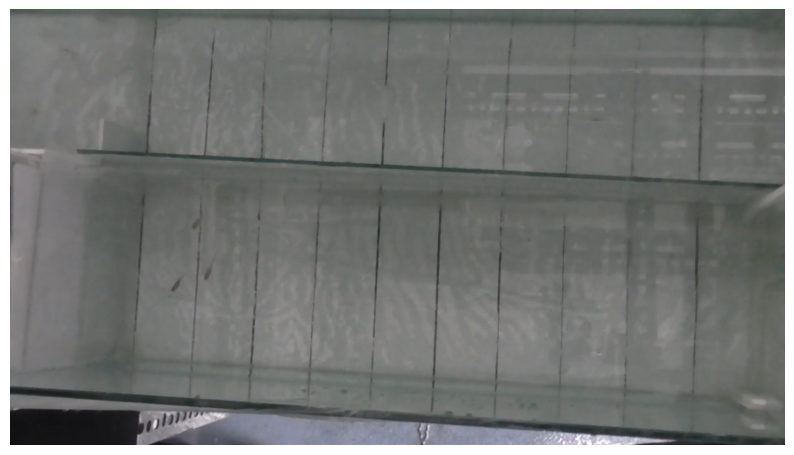

In [14]:
image = cv2.imread("Frames/frame100.0.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=[10,10])
plt.imshow(image)
plt.axis("off")
plt.show()

In [15]:
sam = sam_model_registry["vit_h"](checkpoint="Model/sam_vit_h_4b8939.pth")
# sam.to(device="mps")
mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(image)

RuntimeError: Couldn't load custom C++ ops. This can happen if your PyTorch and torchvision versions are incompatible, or if you had errors while compiling torchvision from source. For further information on the compatible versions, check https://github.com/pytorch/vision#installation for the compatibility matrix. Please check your PyTorch version with torch.__version__ and your torchvision version with torchvision.__version__ and verify if they are compatible, and if not please reinstall torchvision so that it matches your PyTorch install.

In [21]:
print(len(masks))
print(masks[0].keys())

16
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


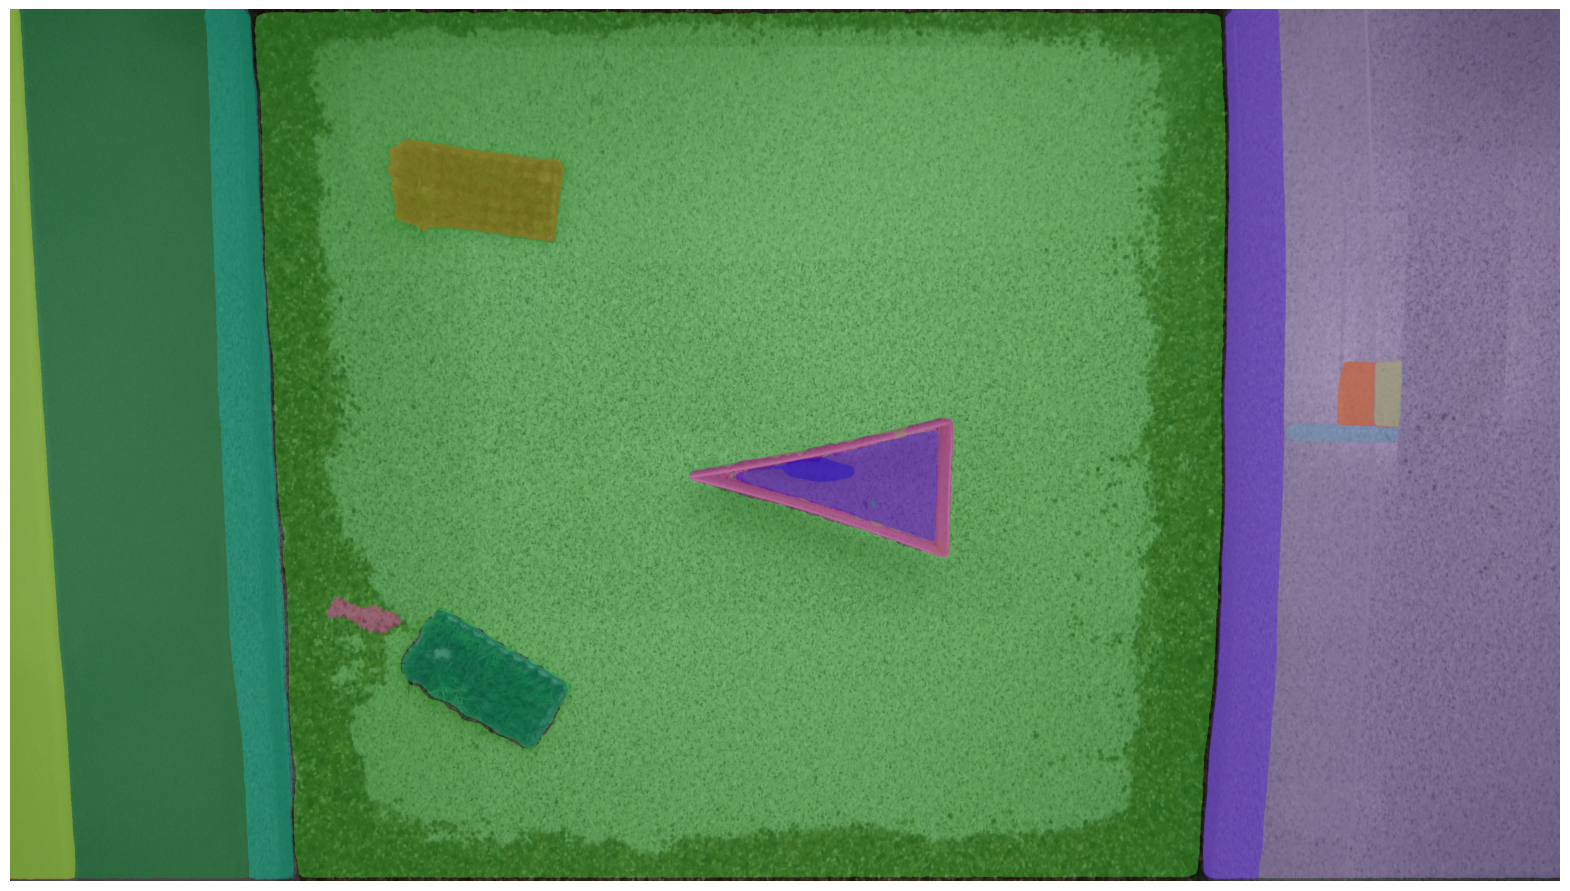

In [22]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks, save_path="Masks/test.png")
plt.axis('off')
plt.show() 